<a href="https://colab.research.google.com/github/mfinke17/Python/blob/main/AR_JM_manuscriptfigure_3toneheatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heatdatacsv.csv to heatdatacsv (25).csv


,Unnamed: 0,Age 24-44,Age 45-59,Age 60+,Male,Female,Health Status Bad/fair,Health Status Good,Low Income,Middle Income,High Income,Unnamed: 11
0,Stay inside,0.60,0.67,0.69,0.64,0.65,0.64,0.65,0.63,0.65,0.66,NaN
1,Change leisure plans,0.32,0.30,0.24,0.28,0.33,0.33,0.40,0.28,0.31,0.31,NaN
2,Change work hours,0.05,0.06,0.04,0.05,0.05,0.05,0.05,0.05,0.06,0.05,NaN
3,Worked from home,0.08,0.06,0.05,0.08,0.06,0.07,0.07,0.06,0.07,0.08,NaN
4,Found place to cool off,0.16,0.08,0.07,0.08,0.13,0.12,0.11,0.11,0.10,0.11,NaN
5,Drank more water,0.55,0.62,0.54,0.56,0.60,0.59,0.58,0.56,0.59,0.59,NaN
6,Dressed differently,0.18,0.18,0.18,0.19,0.17,0.20,0.17,0.18,0.18,0.18,NaN
7,Changed what I ate,0.15,0.20,0.19,0.16,0.19,0.25,0.15,0.20,0.16,0.17,NaN
8,Warned others,0.23,0.27,0.24,0.22,0.27,0.25,0.24,0.24,0.25,0.25,NaN
9,Talked about ways to stay safe,0.10,0.12,0.15,0.12,0.12,0.12,0.12,0.11,0.12,0.12,NaN


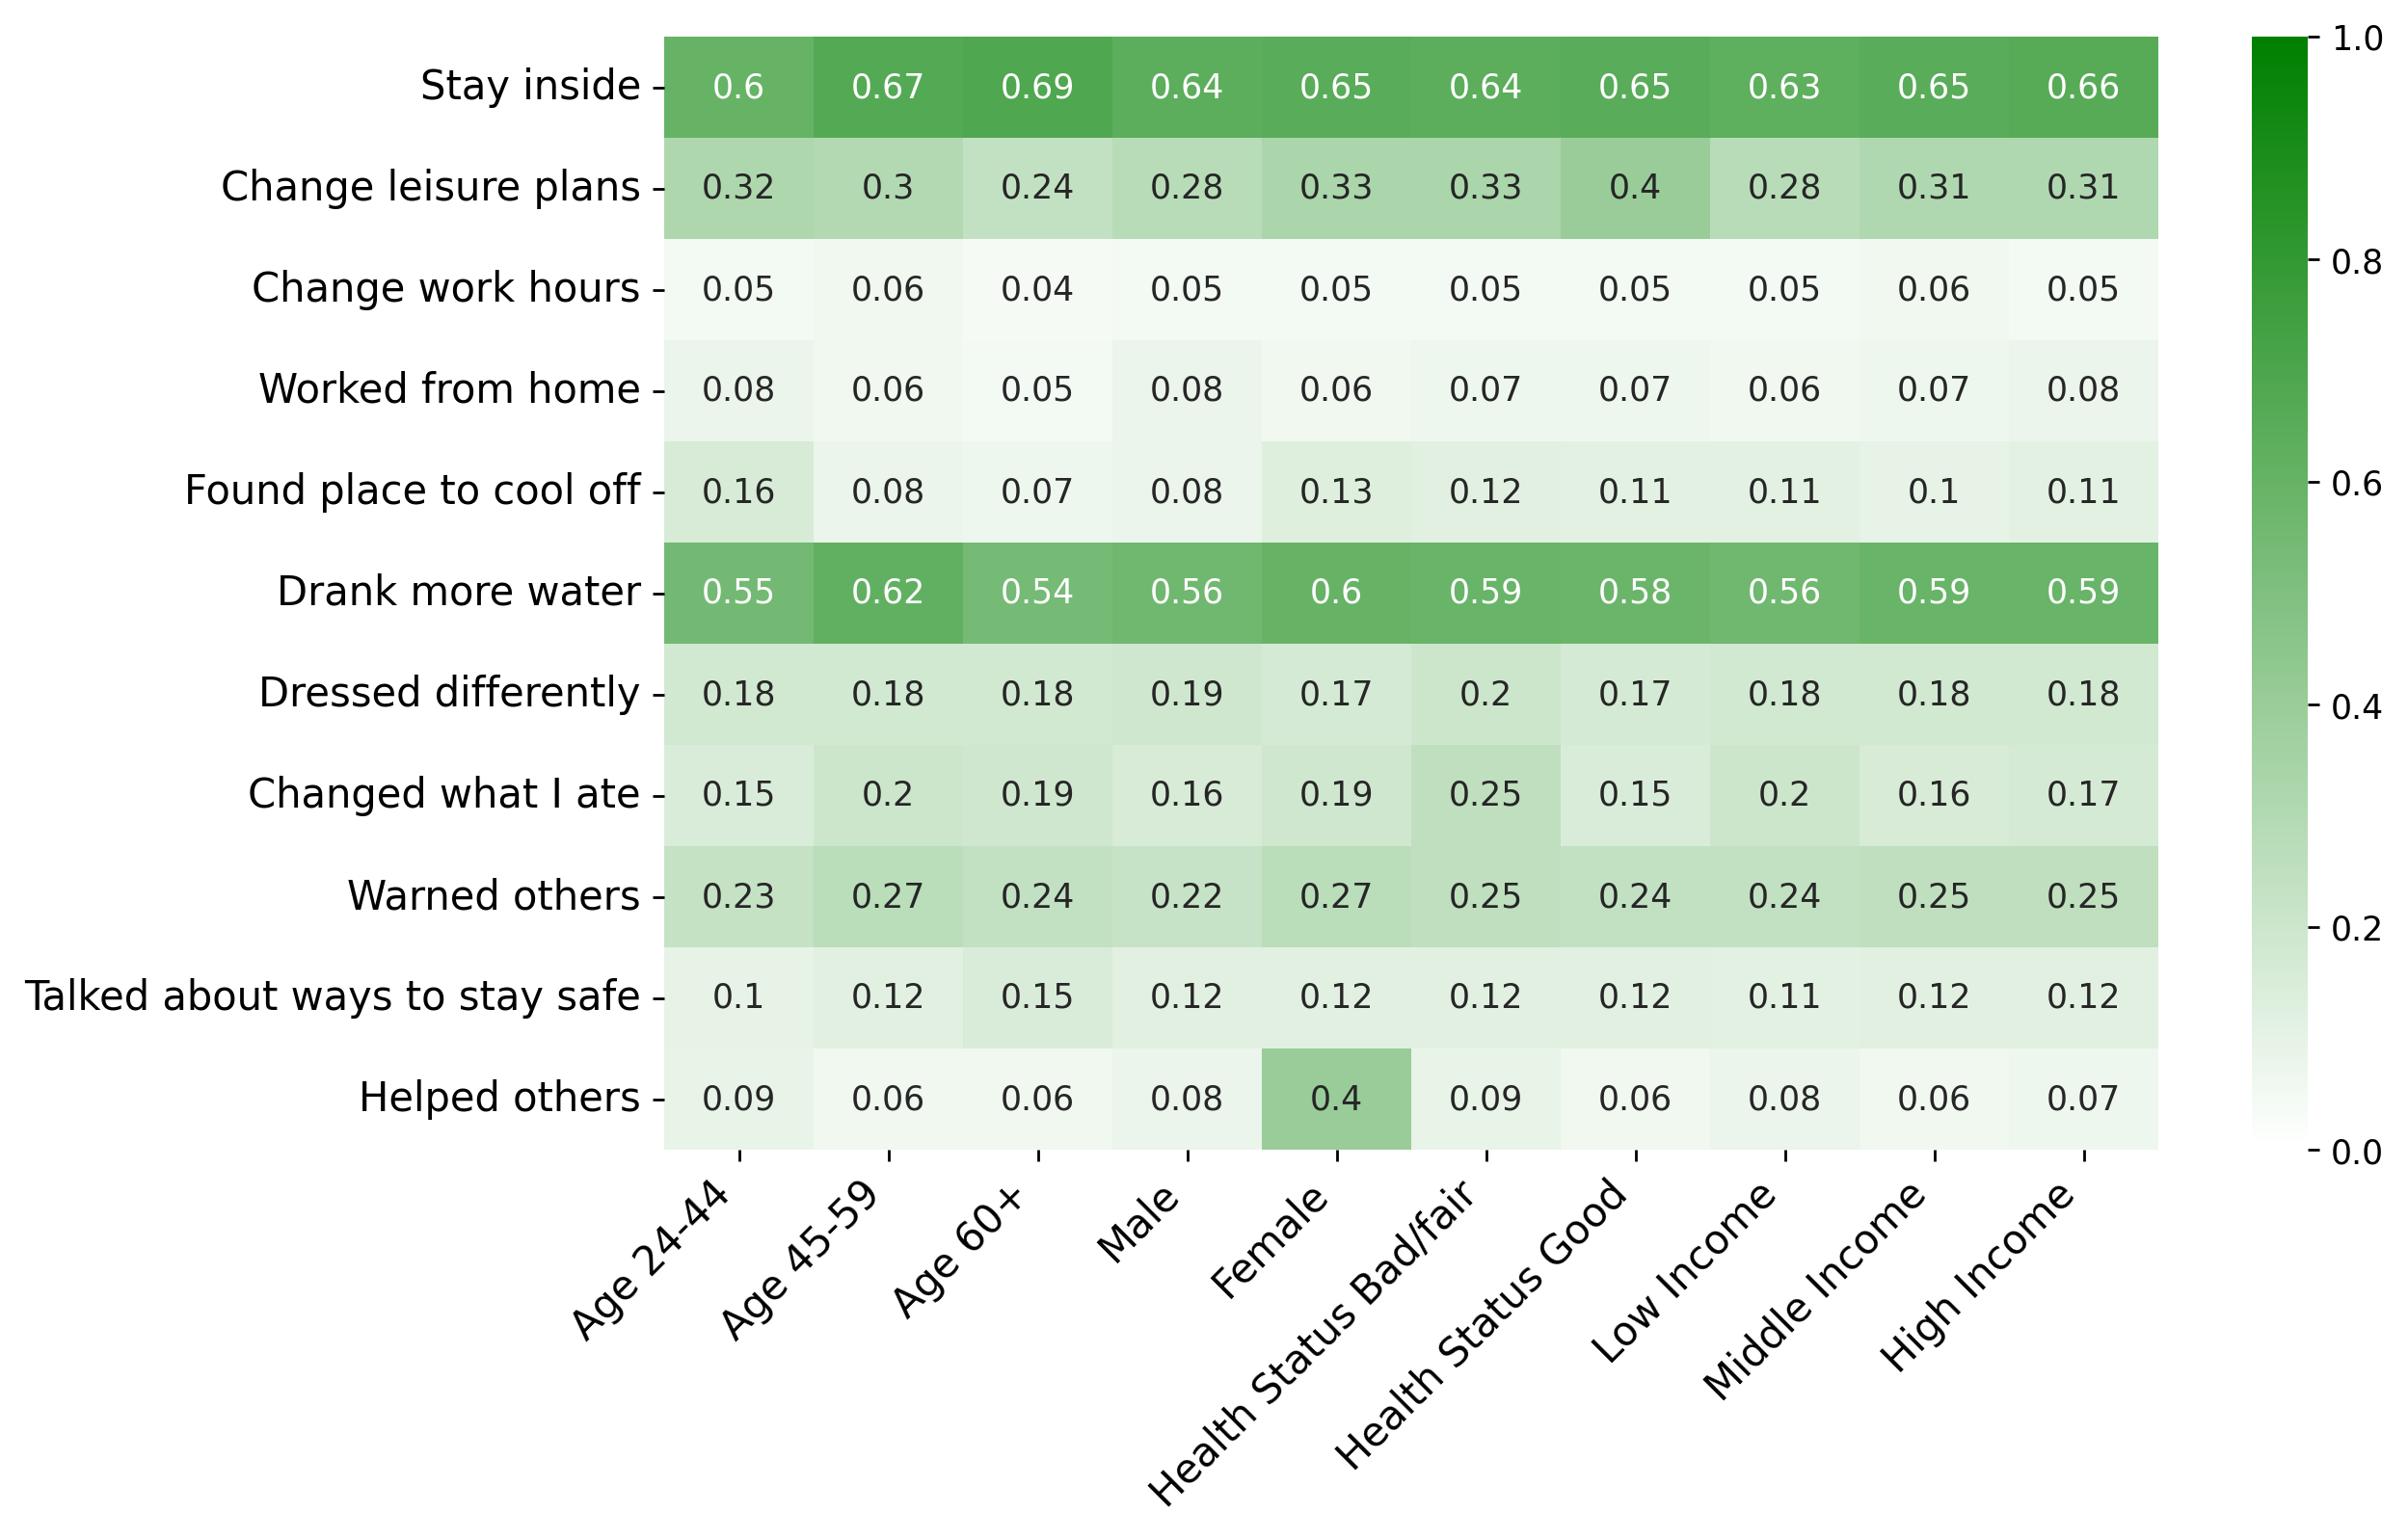

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['heatdatacsv.csv']))
display(df2)

numeric_columns = df2.select_dtypes(include=['float', 'int']).columns
import matplotlib.colors as mcolors
from matplotlib import rcParams
rcParams['figure.dpi'] = 250

df = df2.iloc[:, :-1]

# Drop row 11 from the DataFrame
df = df.drop(11)

df = df.rename(columns={'Unnamed: 0': ''})

# Set the 'Unnamed: 0' column as the index
df.set_index('', inplace=True)

# Convert the DataFrame to numeric values
df = df.apply(pd.to_numeric, errors='coerce')

colors = ['white', 'green']
cmap = mcolors.LinearSegmentedColormap.from_list('Custom', colors)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
heatmap = sns.heatmap(df, annot=True, cmap=cmap, vmin=0, vmax=1)

# Set the y-axis tick labels with Arial font and size 12
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)

# Set the x-axis tick labels with Arial font and size 12
heatmap.set_xticklabels(heatmap.get_xticklabels(), ha='right', rotation=45, fontsize=12)

plt.xticks(rotation=45)

# Show the heatmap
plt.show()


<ipython-input-91-d6588d164795>:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


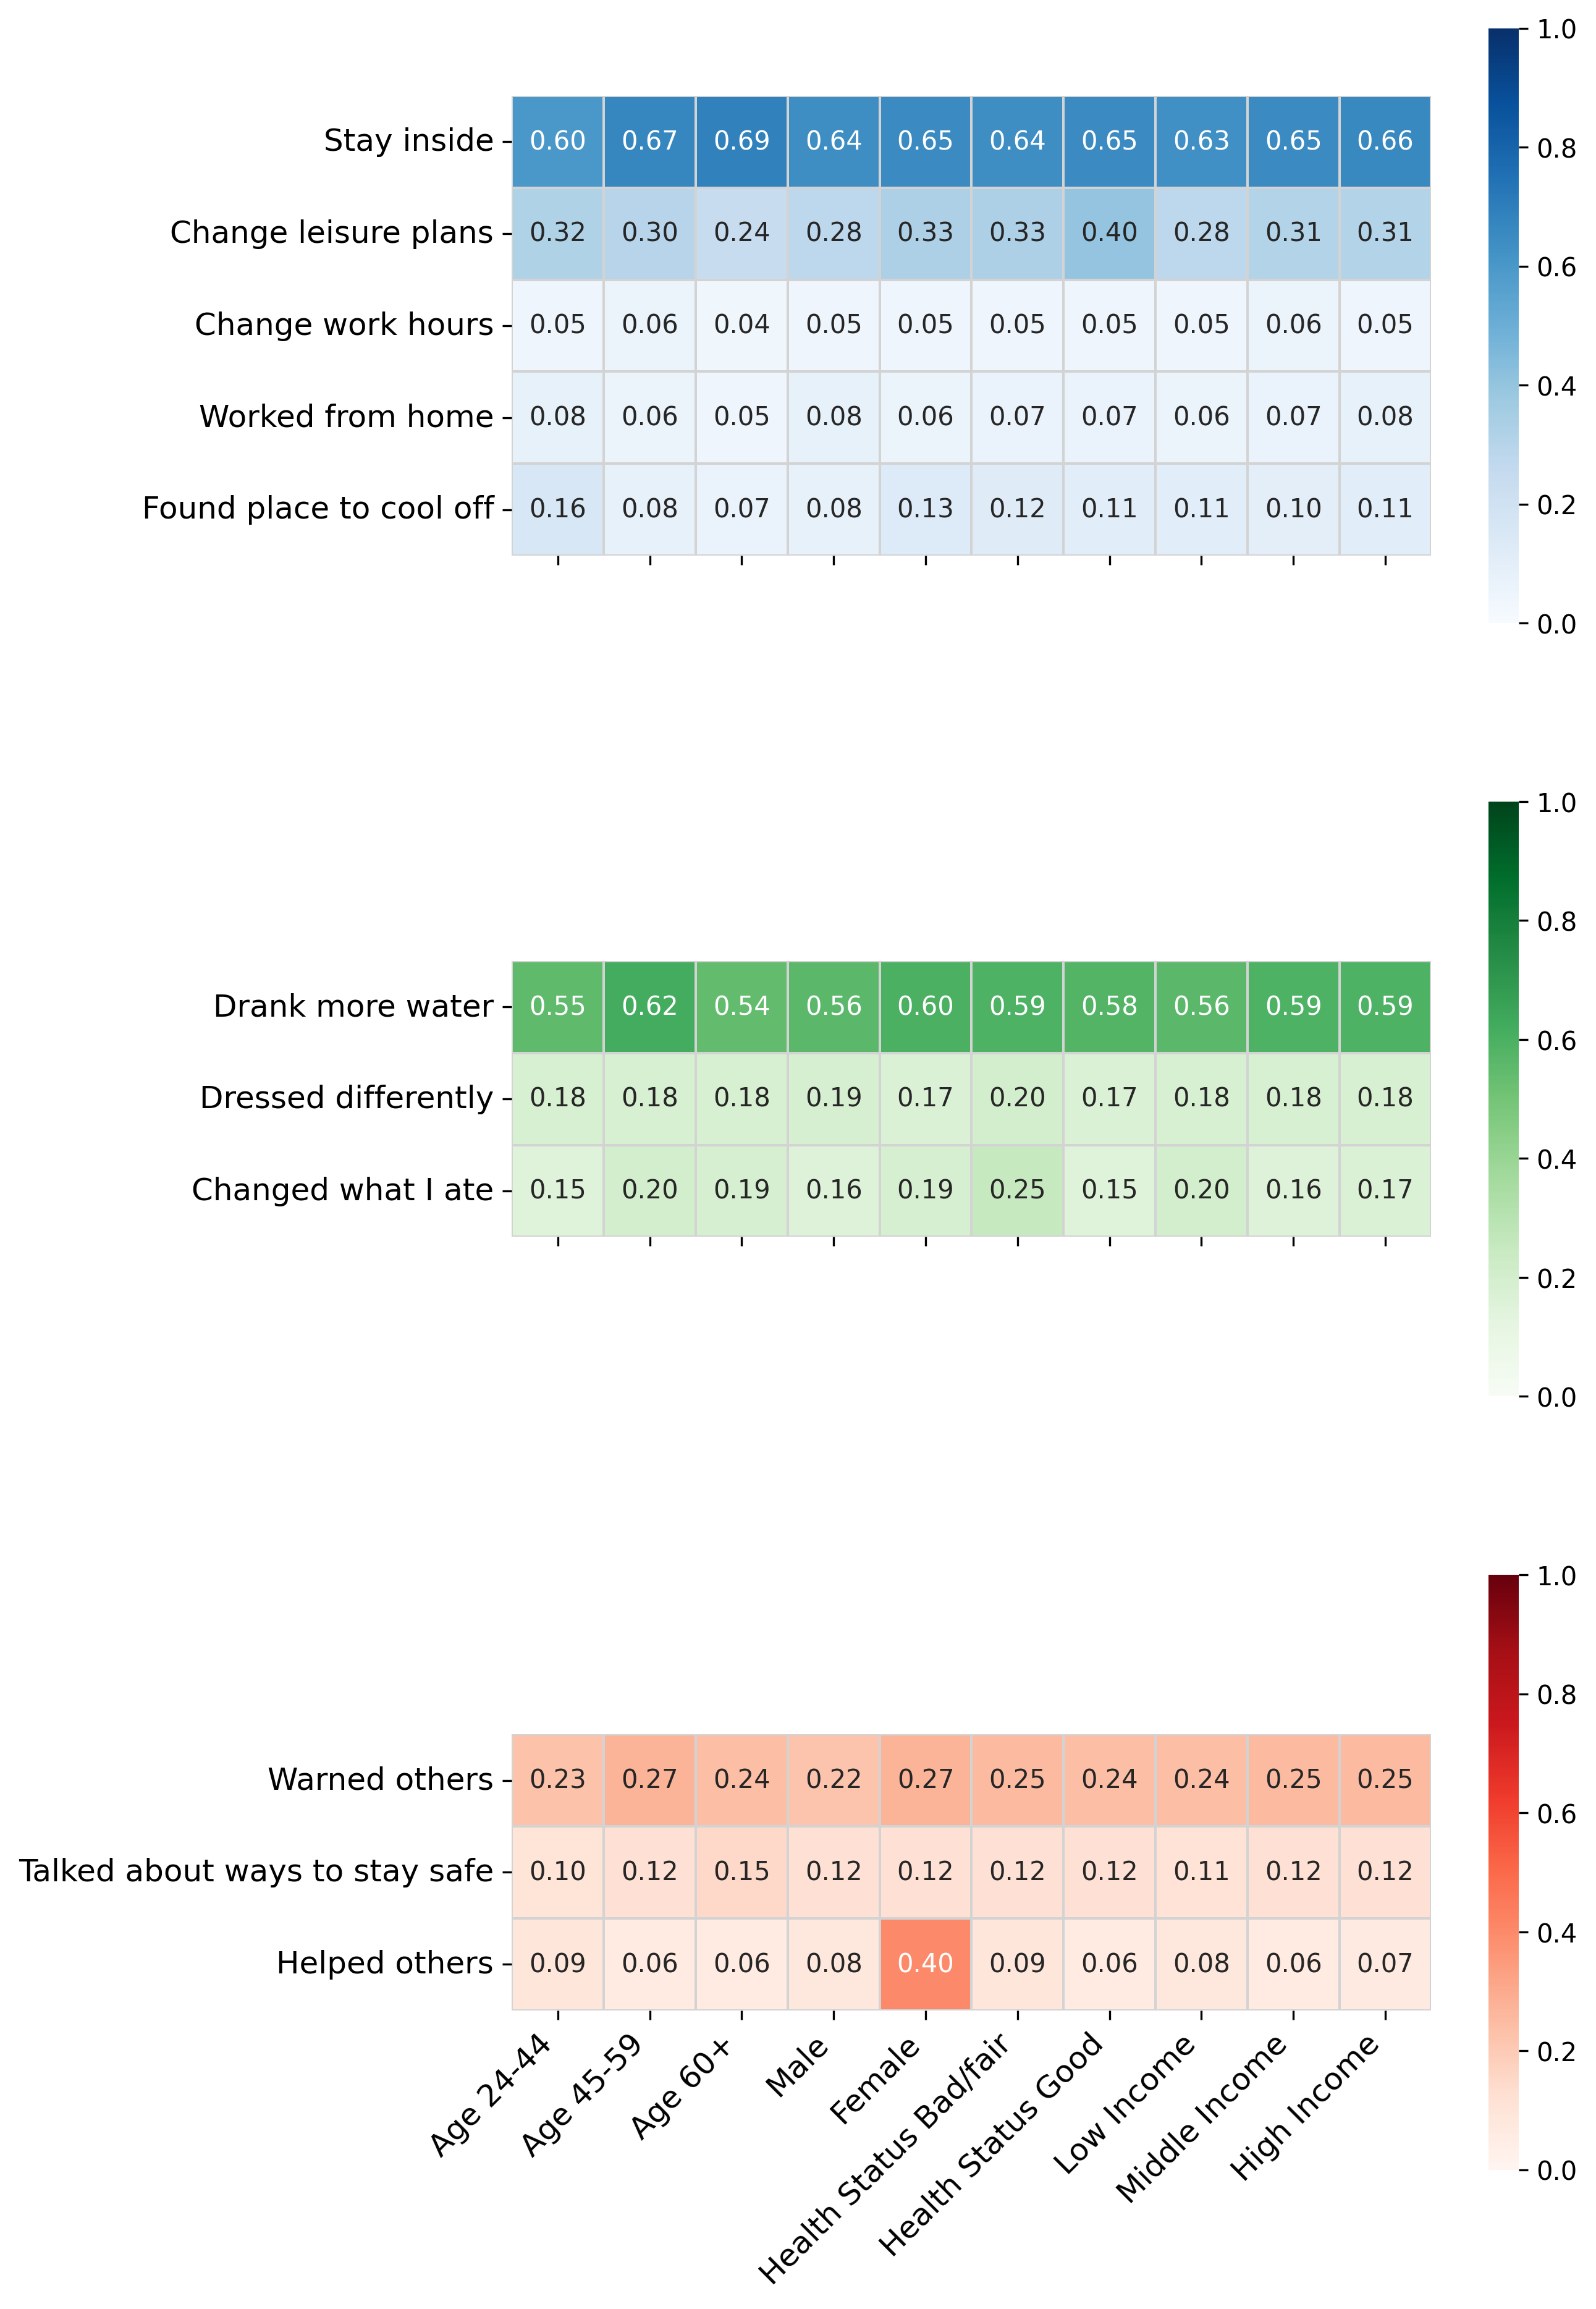

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV data
df = pd.read_csv('heatdatacsv.csv')

# Drop the last column
df = df.iloc[:, :-1]

# Set the 'Unnamed: 0' column as the index
df.set_index('Unnamed: 0', inplace=True)

# Convert the DataFrame to numeric values
df = df.apply(pd.to_numeric, errors='coerce')

# Define the groupings and colors
groupings = {
    'Avoidance behaviors': ['Stay inside', 'Change leisure plans', 'Change work hours', 'Worked from home', 'Found place to cool off'],
    'Reduction behaviors': ['Drank more water', 'Dressed differently', 'Changed what I ate'],
    'Prosocial behaviors': ['Warned others', 'Talked about ways to stay safe', 'Helped others']
}

# Create a custom colormap for each group
group_colors = {
    'Avoidance behaviors': 'Blues',
    'Reduction behaviors': 'Greens',
    'Prosocial behaviors': 'Reds'
}

# Determine the number of rows and columns based on the number of groups
num_groups = len(groupings)
num_cols = 1

# Create subplots for the heatmaps
fig, axes = plt.subplots(num_groups, num_cols, figsize=(8, 5*num_groups), sharex=True, gridspec_kw={'hspace': 0.3})

# Flatten the axes if there's only one group
if num_groups == 1:
    axes = [axes]

# Plot each heatmap in a separate subplot
for i, (group, behaviors) in enumerate(groupings.items()):
    # Filter the data for the current group
    group_data = df.loc[behaviors]

    # Create the heatmap using seaborn
    ax = sns.heatmap(group_data, cmap=group_colors[group], annot=True, vmin=0, vmax=1, cbar=True, square=True, fmt=".2f", linewidths=0.5, linecolor='lightgray', ax=axes[i])

    # Set the x-axis tick labels with Arial font and size 12
    ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=45, fontsize=12)

    # Set the y-axis tick labels with Arial font and size 12
    ax.set_yticklabels(ax.get_yticklabels(), ha='right', rotation=0, fontsize=12)

    # Remove the y-axis title
    ax.set_ylabel('')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()
